> # **Multi Class Classification**


## 1) Installing Packages


In [ ]:
!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorstore 0.1.64 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


## 2) Importing Packages


In [ ]:
# grader-required-cell

import csv
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

## 3) Download the training and test sets


In [ ]:
!pip install gdown==5.1.0

In [ ]:
# sign_mnist_train.csv
!gdown --id 1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
# sign_mnist_test.csv
!gdown --id 1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
To: /content/sign_mnist_train.csv
100% 83.3M/83.3M [00:03<00:00, 26.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg
To: /content/sign_mnist_test.csv
100% 21.8M/21.8M [00:00<00:00, 47.5MB/s]


In [ ]:
TRAINING_FILE = "./sign_mnist_train.csv"
VALIDATION_FILE = "./sign_mnist_test.csv"

## 4) Logging Out Imported Data


In [ ]:
with open(TRAINING_FILE) as training_file:
    line = training_file.readline()
    print(f"First line (header) looks like this:\n{line}")
    line = training_file.readline()
    print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

## 5) Parsing the dataset


In [ ]:
def parse_data_from_input(filename):
    with open(filename) as file:
        # Use csv.reader, passing in the appropriate delimiter
        # Remember that csv.reader can be iterated and returns one line in each iteration
        csv_reader = csv.reader(file, delimiter=",")

        labels = []
        images = []

        isFirst = True

        for row in csv_reader:
            if isFirst:
                isFirst = False
                continue
            labels.append(int(row[0]))
            images.append(np.reshape(row[1:], (28, 28)))

        return np.array(images), np.array(labels)

In [ ]:
training_images, training_labels = parse_data_from_input(TRAINING_FILE)
validation_images, validation_labels = parse_data_from_input(VALIDATION_FILE)

print(
    f"Training images has shape: {training_images.shape} and dtype: {training_images.dtype}"
)
print(
    f"Training labels has shape: {training_labels.shape} and dtype: {training_labels.dtype}"
)
print(
    f"Validation images has shape: {validation_images.shape} and dtype: {validation_images.dtype}"
)
print(
    f"Validation labels has shape: {validation_labels.shape} and dtype: {validation_labels.dtype}"
)

Training images has shape: (27455, 28, 28) and dtype: <U3
Training labels has shape: (27455,) and dtype: int64
Validation images has shape: (7172, 28, 28) and dtype: <U3
Validation labels has shape: (7172,) and dtype: int64


## 6) Visualizing the numpy arrays


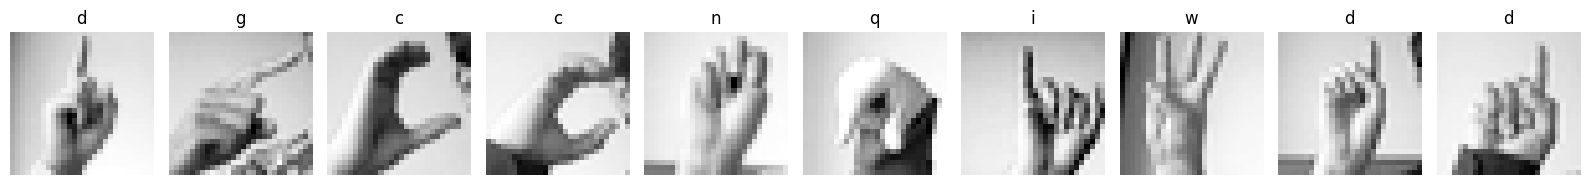

In [ ]:
# Plot a sample of 10 images from the training set
def plot_categories(training_images, training_labels):
    fig, axes = plt.subplots(1, 10, figsize=(16, 15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)

    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis=-1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


plot_categories(training_images, training_labels)

## 7) Creating the generators for the CNN


In [ ]:
def train_val_generators(
    training_images, training_labels, validation_images, validation_labels
):
    # In this section you will have to add another dimension to the data
    # So, for example, if your array is (10000, 28, 28)
    # You will need to make it (10000, 28, 28, 1)
    # Hint: np.expand_dims
    training_images = np.expand_dims(training_images, axis=-1)
    validation_images = np.expand_dims(validation_images, axis=-1)

    train_datagen = ImageDataGenerator(
        rescale=1 / 255,
        horizontal_flip=True,
        fill_mode="nearest",
        rotation_range=40,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
    )

    train_generator = train_datagen.flow(
        x=training_images, y=training_labels, batch_size=32
    )

    validation_datagen = ImageDataGenerator(rescale=1 / 255)

    validation_generator = validation_datagen.flow(
        x=validation_images, y=validation_labels, batch_size=32
    )

    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(
    training_images, training_labels, validation_images, validation_labels
)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (27455, 28, 28, 1)
Labels of training generator have shape: (27455,)
Images of validation generator have shape: (7172, 28, 28, 1)
Labels of validation generator have shape: (7172,)


## 8) Coding the CNN


In [ ]:
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(
                64, (3, 3), activation="relu", input_shape=(28, 28, 1)
            ),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.1),
            tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation="relu"),
            tf.keras.layers.Dense(26, activation="sigmoid"),
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model

In [ ]:
# Save your model
model = create_model()

# Train your model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
858/858 [==============================] - 123s 142ms/step - loss: 2.6746 - accuracy: 0.1856 - val_loss: 1.8180 - val_accuracy: 0.3748
Epoch 2/15
858/858 [==============================] - 123s 143ms/step - loss: 1.6773 - accuracy: 0.4601 - val_loss: 0.9302 - val_accuracy: 0.6992
Epoch 3/15
858/858 [==============================] - 124s 145ms/step - loss: 1.1837 - accuracy: 0.6107 - val_loss: 0.4940 - val_accuracy: 0.8384
Epoch 4/15
858/858 [==============================] - 126s 147ms/step - loss: 0.9062 - accuracy: 0.7001 - val_loss: 0.4733 - val_accuracy: 0.8360
Epoch 5/15
858/858 [==============================] - 123s 143ms/step - loss: 0.7340 - accuracy: 0.7567 - val_loss: 0.4160 - val_accuracy: 0.8543
Epoch 6/15
858/858 [==============================] - 124s 144ms/step - loss: 0.6176 - accuracy: 0.7934 - val_loss: 0.1868 - val_accuracy: 0.9297
Epoch 7/15
858/858 [==============================] - 125s 146ms/step - loss: 0.5496 - accuracy: 0.8165 - val_loss: 0.1765 -

## 9) Plotting the Training History


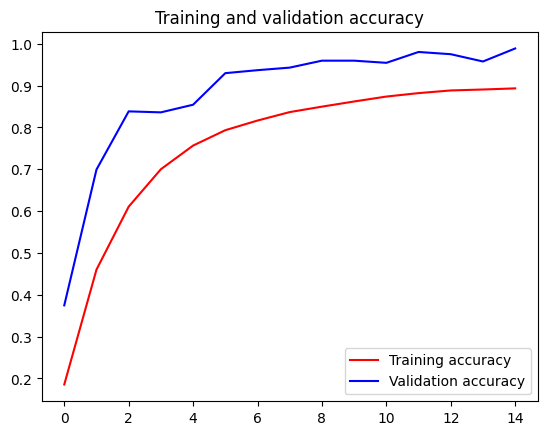

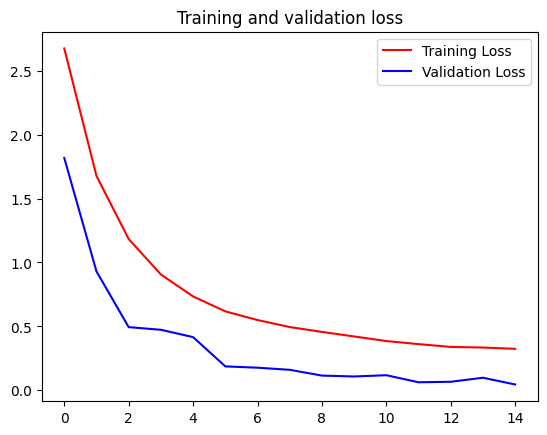

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()